# Exercices
Le but de ces exercices est d'appliquer le modèle de l'accéleration constante à 1D à de nouvelles situations, de complexifier le modèle et d'explorer ses limitations. Nous verrons aussi d'autres types de modèles utilisés en physique.

## Pile ou face
On joue à pile ou face avec une pièce de monnaie. Connaissant les conditions initiales du lancer de la pièce, on aimerait connaître sa trajectoire.

Les trois représentations du mouvement de la pièce de monnaie sont l'accélération $a$, la vitesse $v$ et la position $z$ selon l'axe $z$ :
$$
\left\{
    \begin{array}{lll}
        a(t) &=& g \\
        v(t) &=& gt + v_0\\
        z(t) &=& \dfrac{1}{2} gt^2 + v_0 t + z_0
    \end{array}
\right.
$$

Vous choisirez pour cet exercice de représenter numériquement les fonctions par des tableaux Numpy 1D (représentation discrète). Vous choisirez vous-même l'intervalle et le pas de temps pour la représentation discrète.

1. Représenter graphiquement, l'un au-dessous de l'autre grâce à la fonction `subplot()`, l'accélération, la vitesse et la position $z$ de la pièce, pour $v_0 = -3.2 \mathrm{~m.s^{-1}}$ et $z_0 = -1.5 \mathrm{~m}$. Choisir l'intervalle de temps de façon à ce que la pièce dépasse de peu la position $z=0$.

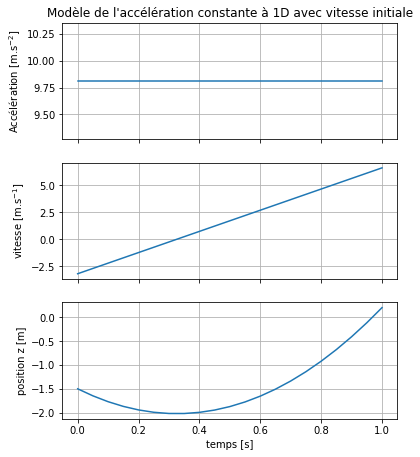

In [1]:
# Importation des modules
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du problème
pesanteur = 9.81 # m.s**-2
vitesse_initiale = -3.2 # m.s**-1
position_z_initiale = -1.5 # m
temps_initial = 0 # s
temps_final = 1.0 # s
pas_temps = 0.05 # s

# Création du tableau temps (discrétisation)
intervalle = temps_final - temps_initial
num_points = int(intervalle / pas_temps) + 1   # Nombre d'éléments
temps = np.linspace(temps_initial, temps_final, num_points)

# Création des autres tableaux
acceleration = np.ones(temps.shape) * pesanteur
vitesse = pesanteur * temps + vitesse_initiale
position_z = 1 / 2 * pesanteur * temps ** 2 + vitesse_initiale * temps + position_z_initiale

# Représentation de l'accélération
plt.subplot(3, 1, 1)
plt.plot(temps, acceleration)
plt.ylabel('Accélération [m.s$^{-2}$]')
plt.grid()
plt.tick_params(axis = 'x', labelbottom = False) # Retire les labels de l'axe x
plt.title("Modèle de l'accélération constante à 1D avec vitesse initiale")

# Représentation de la vitesse
plt.subplot(3, 1, 2)
plt.plot(temps, vitesse)
plt.ylabel('vitesse [m.s$^{-1}$]')
plt.grid()
plt.tick_params(axis = 'x', labelbottom = False) # Retire les labels de l'axe x

# Représentation de la position z
plt.subplot(3, 1, 3)
plt.plot(temps, position_z)
plt.ylabel('position z [m]')
plt.xlabel('temps [s]')
plt.grid()

plt.subplots_adjust(top = 1.5) # Agrandit l'espace entre les figures

plt.show()

2. Représenter le mouvement de l'objet dans le plan $(x0z)$, pour $x_0 = 4 \mathrm{~m}$. Sur cette représentation, placer un point rouge à l'endroit de la position initiale de l'objet.

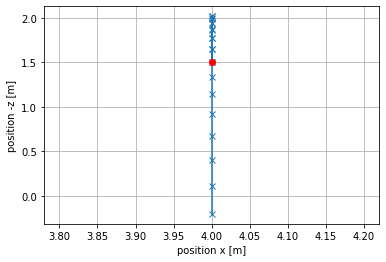

In [2]:
# Paramètres du problème
position_x_initiale = 4 # m

# Création du tableau position x
position_x = np.ones(temps.shape) * position_x_initiale

# Représentation graphique du mouvement
plt.plot(position_x, -position_z, 'x-')

# Style
plt.xlabel("position x [m]")
plt.ylabel("position -z [m]")
plt.grid()

# Position initiale
plt.plot(position_x_initiale, -position_z_initiale, 'ro')

plt.show()

## Tir à l'arc
Pour un tir à l'arc, nous souhaitons modéliser la trajectoire de la flèche, en utilisant le modèle de l'accélération constante. Nous modélisons la flèche par une particule ponctuelle. La cible se trouve à 40 mètres du tireur, à une hauteur de $1,5 \mathrm{~m}$, et fait $50 \mathrm{~cm}$ de diamètre.

Pour un mouvement à 2D suivant les axes $z$ et $x$, nous avons les équations suivantes pour les vitesses suivant les axes $z$ et $x$, respectivement :
$$
\left\{
    \begin{array}{lll}
        v_z(t) &=& gt + v_0^z\\
        v_x(t) &=& v_0^x
    \end{array}
\right.
$$

et pour les positions suivant les axes $z$ et $x$, respectivement :
$$
\left\{
    \begin{array}{lll}
        z(t) &=& \dfrac{1}{2} gt^2 + v_0^z t + z_0\\
        x(t) &=& v_0^x t + x_0
    \end{array}
\right.
$$

1. Créer un DataFrame Pandas pour représenter le mouvement. Vous choisirez vous-même la discrétisation des fonctions. L'index du DataFrame doit représenter le temps. Vous allez ensuite créer 5 colonnes pour le DataFrame, représentant : l'accélération, la vitesse suivant l'axe $z$, la vitesse suivant l'axe $x$, la position suivant l'axe $z$, et la position suivant l'axe $x$. Les paramètres du problème sont :
$$
\left\{
    \begin{array}{lll}
        v_0^z = -1.3 \ \mathrm{m.s^{-1}}\\
        v_0^x = 99.6 \ \mathrm{m.s^{-1}}\\
        z_0 = -1.5 \ \mathrm{m}\\
        x_0 = 0.0 \ \mathrm{m}
    \end{array}
\right.
$$

In [3]:
# Importation des modules
import numpy as np
import pandas as pd

# Paramètres du problème
pesanteur = 9.81 # m.s**-2
vitesse_z_initiale = -1.3 # m.s**-1
position_z_initiale = -1.5 # m
vitesse_x_initiale = 99.6 # m.s**-1
position_x_initiale = 0.0 # m
temps_initial = 0 # s
temps_final = 0.5 # s
pas_temps = 0.01 # s

# Création du tableau temps (discrétisation)
intervalle = temps_final - temps_initial
num_points = int(intervalle / pas_temps) + 1   # Nombre d'éléments
temps = np.linspace(temps_initial, temps_final, num_points)

# Création du DataFrame avec une colonne accélération
acceleration = np.ones(temps.shape) * pesanteur
df = pd.DataFrame(data = acceleration, index = temps, columns = ['acceleration'])

# Création des autres colonnes
df["vitesse_z"] = pesanteur * temps + vitesse_z_initiale
df["vitesse_x"] = vitesse_x_initiale
df["position_z"] = 1 / 2 * pesanteur * temps ** 2 + vitesse_z_initiale * temps + position_z_initiale
df["position_x"] = vitesse_x_initiale * temps + position_x_initiale

# Affichage du tableau pour vérification
df.head(n = 10)

,acceleration,vitesse_z,vitesse_x,position_z,position_x
0.00,9.81,-1.3000,99.6,-1.500000,0.000
0.01,9.81,-1.2019,99.6,-1.512509,0.996
0.02,9.81,-1.1038,99.6,-1.524038,1.992
0.03,9.81,-1.0057,99.6,-1.534585,2.988
0.04,9.81,-0.9076,99.6,-1.544152,3.984
0.05,9.81,-0.8095,99.6,-1.552738,4.980
0.06,9.81,-0.7114,99.6,-1.560342,5.976
0.07,9.81,-0.6133,99.6,-1.566966,6.972
0.08,9.81,-0.5152,99.6,-1.572608,7.968
0.09,9.81,-0.4171,99.6,-1.577269,8.964


2. Représenter le mouvement de l'objet dans le plan $(x0z)$, pour $z\in [0,2] \mathrm{~m}$ et $x\in [0,30] \mathrm{~m}$. Sur cette représentation, placer un point rouge à l'endroit de la position initiale de l'objet.

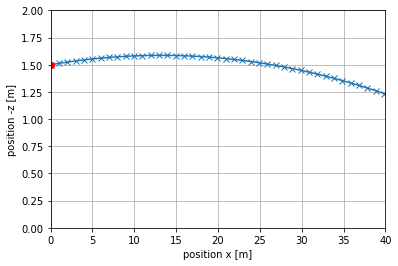

In [4]:
# Importation des modules
import matplotlib.pyplot as plt

# Représentation graphique du mouvement
plt.plot(df["position_x"], -df["position_z"], 'x-')

# Style
plt.xlabel("position x [m]")
plt.ylabel("position -z [m]")
plt.ylim(0, 2)
plt.xlim(0, 40)
plt.grid()

# Position initiale
plt.plot(position_x_initiale, -position_z_initiale, 'ro')

plt.show()

3. En choississant mieux les limites des axes pour la représentation du mouvement, déterminez si le tireur atteint la cible.

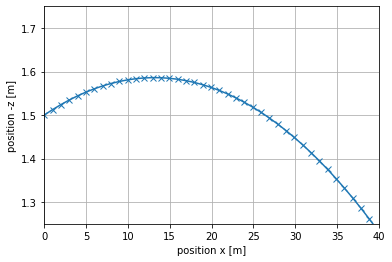

In [5]:
# Représentation graphique du mouvement
plt.plot(df["position_x"], -df["position_z"], 'x-')

# Style
plt.xlabel("position x [m]")
plt.ylabel("position -z [m]")
plt.ylim(1.5 - 0.25, 1.5 + 0.25)
plt.xlim(0,40)
plt.grid()

plt.show()

# On voit que le tireur n'atteint pas sa cible

4. En réflechissant aux limites de votre modèle, est-ce que la conclusion de cette étude pourrait être changée ? Comment améliorer le modèle ?

Le modèle de particule ponctuelle pour une flèche n'est sûrement pas adapté. En effet, la flèche, de par sa longueur et son empenage, est optimisée pour garder une trajectoire horizontale. Il faudrait adapter notre modèle de flèche pour prendre en compte son extension, et notre modèle d'interaction pour prendre en compte les frottements de l'air.

## Première détection d'onde gravitationnelle
Une [onde gravitationnelle](https://fr.wikipedia.org/wiki/Onde_gravitationnelle) est une oscillation de l'espace et du temps qui se propage à la vitesse de la lumière, dont Albert Einstein a prédit l'existence en 1916. GW150914 est le nom du signal à l'origine de la première observation directe d'ondes gravitationnelles, faite le 14 septembre 2015 sur les deux sites américains jumeaux LIGO construits en Louisiane (Livingston) et dans l'État de Washington (Hanford) à environ trois mille kilomètres de distance.

Ce signal correspond aux prédictions de la relativité générale concernant la chute en spirale et la fusion d'une paire de trous noirs de 36 et 29 fois la masse du Soleil, et l'effet provoqué par le trou noir résultant. Cet évènement a dégagé pendant un court instant autant d'énergie que le rayonnement de toutes les étoiles de l'univers observable ! Cette détection marque le début de l'astronomie gravitationnelle, avec aujourd'hui [de nombreux autres événements détectés](https://fr.wikipedia.org/wiki/Liste_d%27ondes_gravitationnelles), correspondant toujours à la fusion d'objets compacts.

1. Dans le fichier *gw.dat* il y a trois colonnes correspondant respectivement au temps, au signal du détecteur de Hanford, et au signal de Livingston. Lire le fichier et stocker les données dans trois tableaux Numpy différents.

In [6]:
# Importation des modules
import numpy as np

# Importation des données
time, gw1, gw2 = np.loadtxt('gw.dat', unpack = True)

2. La fusion des 2 trous noirs a lieu au temps $t_0 = 1126259462.422 \mathrm{~s}$. Représenter le signal du détecteur de Hanford en fonction du temps, en centrant le graphique sur le temps $t_0$ avec une fenêtre de $2 \mathrm{~s}$, et limiter l'échelle des ordonnées entre $-4$ et $4$. Mettre un titre et nommer les axes. Que constatez-vous ?

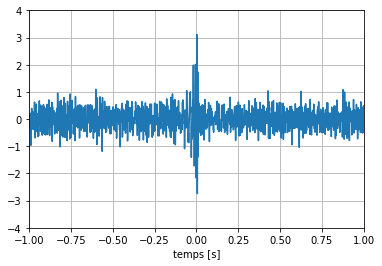

In [7]:
# Importation des modules
import matplotlib.pyplot as plt

# Graphique
time_event = 1126259462.422
plt.plot(time-time_event, gw1)

# Style
plt.xlim(-1, 1)
plt.ylim(-4, 4)
plt.grid()
plt.xlabel('temps [s]')

plt.show()

# On voit clairement un signal sortir du bruit des données au moment de la fusion des 2 trous noirs.

3. Les physiciens ont calculé un modèle théorique du signal à partir des équations de la relativité générale. Lire le modèle dans le fichier *gw_model.dat*. Il contient 2 colonnes : le temps et le modèle théorique. Cette échelle de temps est décalée par rapport à l'échelle de temps du signal, car $t=0$ au moment de la fusion des deux trous noirs. Représenter sur un même graphique et avec la même échelle de temps le signal du détecteur de Hanford et le modèle théorique. Limiter l'échelle des ordonnées entre $-4$ et $4$, et l'échelle de temps à une fenêtre de $200 \mathrm{~ms}$ autour de l'instant de la fusion du trou noir. Que constatez-vous ?

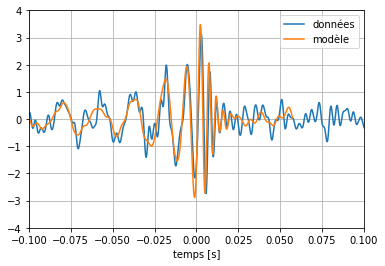

In [8]:
# Lecture du modèle
time_model, model = np.loadtxt('gw_model.dat', unpack = True)

# Graphique
plt.plot(time - time_event, gw1) # Données
plt.plot(time_model, model)      # Modèle

# Style
plt.xlim(-0.1, 0.1)
plt.ylim(-4, 4)
plt.legend(('données', 'modèle'))
plt.xlabel('temps [s]')
plt.grid()

plt.show()

# On constate que le modèle se superpose plutôt bien aux données

4. De la même façon, représenter sur un même graphique et avec la même échelle de temps le signal du détecteur de Livingston et le modèle théorique. Que constatez-vous ?

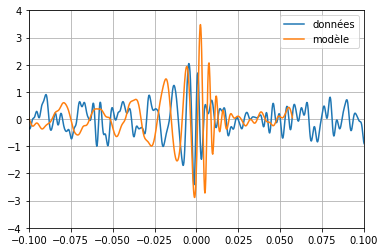

In [9]:
# Graphique
plt.plot(time - time_event, gw2)
plt.plot(time_model, model)

# Style
plt.xlim(-0.1, 0.1)
plt.ylim(-4, 4)
plt.legend(('données', 'modèle'))
plt.grid()

plt.show()

# On constate que le modèle ne représente plus bien les données. Les deux semblent décalés.

5. L'onde gravitationnelle met environ $\delta t = 7$ ms à se propager depuis le détecteur de Livingston au détecteur de Hanford. En calculant le temps d'échantillonage $h$ du signal (c'est-à-dire le temps écoulé entre deux points consécutifs du signal), déduire quel est le nombre de pas $N$ qui correspond le mieux à $\delta t$, tel que $\delta t \approx N \times h$.

In [10]:
# Calcul du pas d'échantillonage
dt = time[1]-time[0]

# Calcul du nombre de pas
dt1 = 7e-3
N = int(round(dt1 / dt))

# Affichage
print(N)

29


6. Définir une fonction de signature `decalage(u, N)`, avec $u$ un tableau numpy de longueur $N_u$ et $N$ un entier, qui retourne un tableau $v$ décalé de $N$ indices, tel que $v_{i+N} = u_i$ pour $0\le i<N_u-N$, et $v_i = 0$ pour $0\le i<N$.

In [11]:
# Définition de la fonction
def decalage(u, N):
    """ Décale le tableau u de N indice vers l'arrière """
    Nd = np.size(u)
    v = np.zeros(u.shape)
    for i in range(Nd - N):
        v[i + N] = u[i]
    return v

In [12]:
# Autre solution plus compacte
def decalage(u, N):
    """ Décale le tableau u de N indice vers l'arrière """
    return np.concatenate((np.zeros(N), u[:len(u) - N]))

7. Utiliser cette fonction pour décaler le signal du détecteur de Livingston de l'entier $N$ déterminé à la question 5, et représenter sur un même graphique et avec la même échelle de temps le signal du détecteur de Livingston décalé et le modèle théorique. Que constatez-vous ? Ajouter au graphique le signal du détecteur de Hanford et légender le graphique.

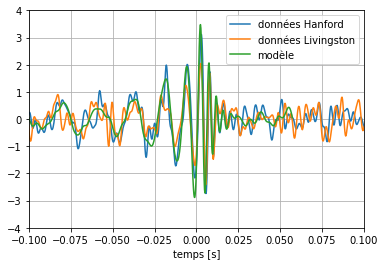

In [13]:
# Décalage du signal de Livingston
gw2_decal = decalage(gw2, N)

# Graphique
plt.plot(time - time_event, gw1)
plt.plot(time - time_event, gw2_decal)
plt.plot(time_model, model)

# Style
plt.xlim(-0.1, 0.1)
plt.ylim(-4, 4)
plt.legend(('données Hanford', 'données Livingston', 'modèle'))
plt.xlabel('temps [s]')
plt.grid()

plt.show()